<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reologia" data-toc-modified-id="Reologia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reologia</a></span><ul class="toc-item"><li><span><a href="#Fluídos-Newtonianos" data-toc-modified-id="Fluídos-Newtonianos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fluídos Newtonianos</a></span></li><li><span><a href="#CF-de-MG---Carreau" data-toc-modified-id="CF-de-MG---Carreau-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CF de MG - Carreau</a></span></li></ul></li></ul></div>

In [1]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False, 'text.latex.unicode':True})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps, quad

# Reologia
## Fluídos Newtonianos

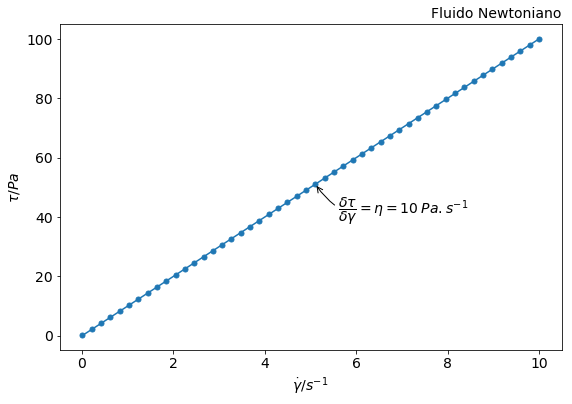

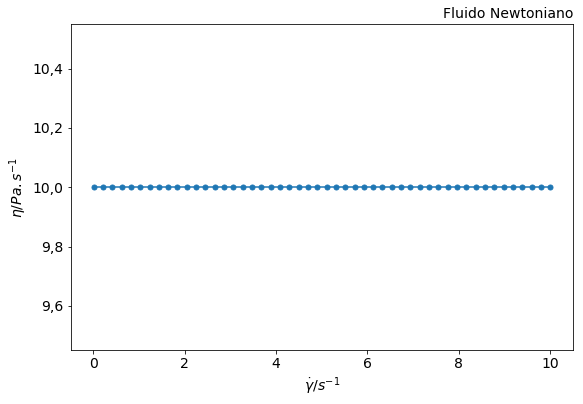

In [57]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False, 'text.latex.unicode':True})
visc = 10   # Pa.s
taxa_cis = np.linspace(0.01, 10)  # s-1
tensao = visc * taxa_cis  # Pa

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))

ax1.plot(taxa_cis, tensao, marker='o', markersize=5)
ax2.plot(taxa_cis, [visc] * len(taxa_cis), marker='o', markersize=5)

ax1.set(xlabel=r'$\dot{\gamma}/s^{-1}$', ylabel=r'$\tau/Pa$')
ax1.annotate(s=r'$\dfrac{\delta \tau}{\delta \gamma}=\eta=10\:Pa.s^{-1}$',
             xy=(taxa_cis[25], tensao[25]),
             xytext=(taxa_cis[25] + 0.5, tensao[25] - 10),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.4' , 'color':'k'})
ax1.set_title('Fluido Newtoniano', loc='right', fontsize='medium')

ax2.set(xlabel=r'$\dot{\gamma}/s^{-1}$', ylabel=r'$\eta/Pa.s^{-1}$')
ax2.set_title('Fluido Newtoniano', loc='right', fontsize='medium')

fig1.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\reologia\newtoniano_exemplo_tauGP.pdf')
fig2.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\reologia\newtoniano_exemplo_etaGP.pdf')

## CF de MG - Carreau

In [34]:
def Carreau(GP, eta_0, eta_inf, GP_b, n):
    """Eta = eta_inf + (eta_0 - eta_inf) / (1+(GP/GP_b)**2)**(n/2)
    GP_b is a constant with the dimension of time and n is a dimensionless constant"""
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** 2) ** (n / 2)

def Cross(GP, eta_0, eta_inf, GP_b, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** n)

def CarreauYasuda(GP, eta_0, eta_inf, lbda, a, n):
    """Carreau-Yasuda: eta(GP) = eta_inf + (eta_0 - eta_inf)(1+(lambda * GP)**a)**((n-1)/a)"""
    return eta_inf + (eta_0 - eta_inf) / (1 + (lbda * GP) ** a) ** ((n - 1) / a)

def CarreauYasuda2(GP, eta_0, eta_inf, GP_b, a, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** a) ** ((n - 1) / a)

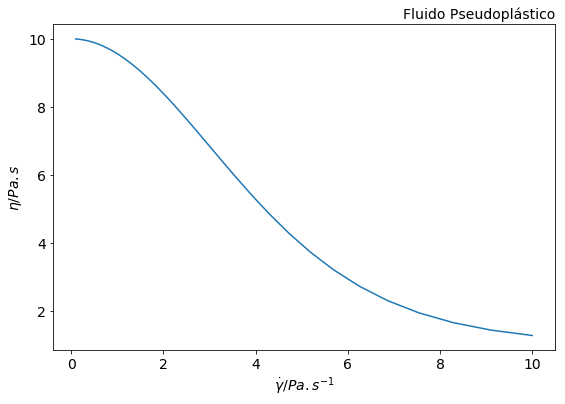

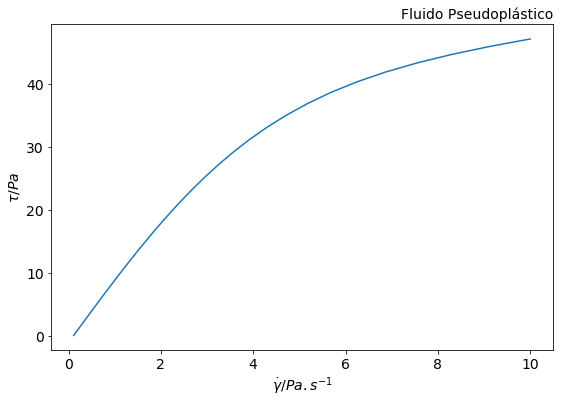

In [110]:
eta_0 = 10 
eta_inf = 1  
GP_b = 10     
n = 10        

slopes = []
slp_pos = []

fig, axCA = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, axCA_tau = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-1, 1)
y_carr = np.log10(Carreau(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_carr)
deriv2 = np.diff(y_carr, n=2)
GP = np.log10(GP)

# slp = (y_carr[deriv.argmin() + 1] - y_carr[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
# inter = y_carr[deriv.argmin()] - slp * GP[deriv.argmin()]
# line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
# line_y = inter + slp * line_x

slopes.append(slp)

GP = 10 ** GP
y_carr = 10 ** y_carr
# line_x = 10 ** line_x
# line_y = 10 ** line_y

axCA.plot(GP, y_carr)
# axCA.plot(line_x, line_y, c='red', linestyle='--')
# axCA.set_xscale('log')
# axCA.set_yscale('log')

linestyles = {'c': 'red', 'linestyle':':'}
textstyles = {'fontsize': 15, 'color':'red'}

axCA.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA.set_xlabel('$\dot{\gamma}/Pa.s^{-1}$')
axCA.set_ylabel('$\eta/Pa.s$')
# axCA.axhline(eta_0, **linestyles)
# axCA.axhline(eta_inf, **linestyles)

# axCA.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCA.axvline(GP[deriv2.argmax()], **linestyles)

# axCA.text(0.05, eta_0 + 10, r'$\eta_0$', **textstyles)
# axCA.text(500, eta_inf + 0.7, r'$\eta_\infty$', **textstyles)
# axCA.set_ylim((eta_inf*0.9, eta_0*1.5))
# axCA.text(GP[deriv.argmin()], y_carr[deriv.argmin()], r'$n$', **textstyles)
# axCA.text(GP[deriv2.argmin() - 4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)

#fig.savefig('Carreau.png', dpi=600)
fig.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\reologia\Pseudoplastico_eta.pdf')

cumulative = [quad(Carreau, GP[0], GP[i], args=(eta_0, eta_inf, GP_b, n))[0] for i in range(1, len(GP))]
axCA_tau.plot(GP[1:], cumulative)
axCA_tau.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA_tau.set_xlabel('$\dot{\gamma}/Pa.s^{-1}$')
axCA_tau.set_ylabel(r'$\tau/Pa$')
# axCA_tau.set_xscale('log')
# axCA_tau.set_yscale('log')
fig2.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\reologia\Pseudoplastico_tau.pdf')

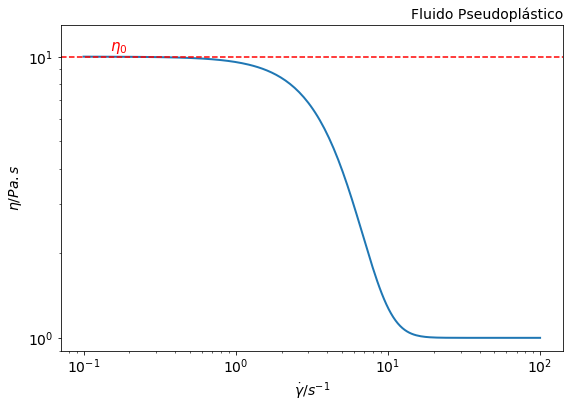

In [134]:
eta_0 = 10 
eta_inf = 1  
GP_b = 10     
n = 10        

slopes = []
slp_pos = []

fig, axCA = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-1, 2, num=200)
y_carr = np.log10(Carreau(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_carr)
deriv2 = np.diff(y_carr, n=2)
GP = np.log10(GP)

slp = (y_carr[deriv.argmin() + 1] - y_carr[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
inter = y_carr[deriv.argmin()] - slp * GP[deriv.argmin()]
line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
line_y = inter + slp * line_x

slopes.append(slp)

GP = 10 ** GP
y_carr = 10 ** y_carr

axCA.plot(GP, y_carr, linewidth=2)
# axCA.plot(line_x, line_y, c='red', linestyle='--')
axCA.set_xscale('log')
axCA.set_yscale('log')

linestyles = {'c': 'red', 'linestyle':'--'}
textstyles = {'fontsize': 15, 'color':'red'}

axCA.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA.set_xlabel('$\dot{\gamma}/s^{-1}$')
axCA.set_ylabel('$\eta/Pa.s$')
axCA.axhline(eta_0, **linestyles)
# axCA.axhline(eta_inf, **linestyles)
axCA.set_ylim((eta_inf*0.9, eta_0*1.3))

# axCA.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCA.axvline(GP[deriv2.argmax()], **linestyles)

axCA.text(0.15, eta_0+0.5, r'$\eta_0$', **textstyles)
# axCA.text(40, eta_inf+0.1, r'$\eta_\infty$', **textstyles)
# axCA.text(GP[deriv.argmin()], y_carr[deriv.argmin()], r'$n$', **textstyles)
# axCA.text(GP[deriv2.argmin() - 4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)


fig.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\reologia\Pseudoplastico_loglog.pdf')

In [83]:
integral_q = quad(Carreau, GP[0], GP[-1], args=(eta_0, eta_inf, GP_b, n))
integral_s = simps(y_carr, GP)
print(integral_q, integral_s)

(5297.071310514243, 2.950765065384359e-09) 5296.888676207453


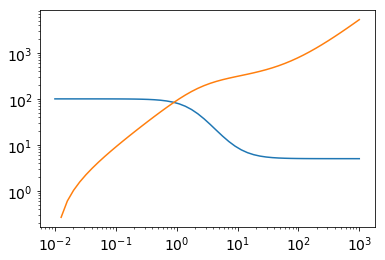

In [92]:

plt.xscale('log')
plt.yscale('log')